In [120]:
import pandas as pd
import numpy as np
import scipy as sp

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import TheilSenRegressor, LogisticRegressionCV

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [82]:
def preprocess_data(data):
    data = data.drop(['data_name', 'doc_name', 'filter_length', 'spike_count', 'interval_name'], axis=1)
        
    oh = pd.get_dummies(data['type'])
    data = pd.concat([data, oh], axis=1).drop(['type'], axis=1)
    
    return data

In [83]:
awake = pd.read_csv('data/awake.csv')
sleep = pd.read_csv('data/sleep.csv')

awake['awake'] = 1
sleep['awake'] = 0

data = pd.concat([awake, sleep])

In [84]:
data = preprocess_data(data)

In [85]:
data.to_csv('preprocessed_data.csv', index=False)

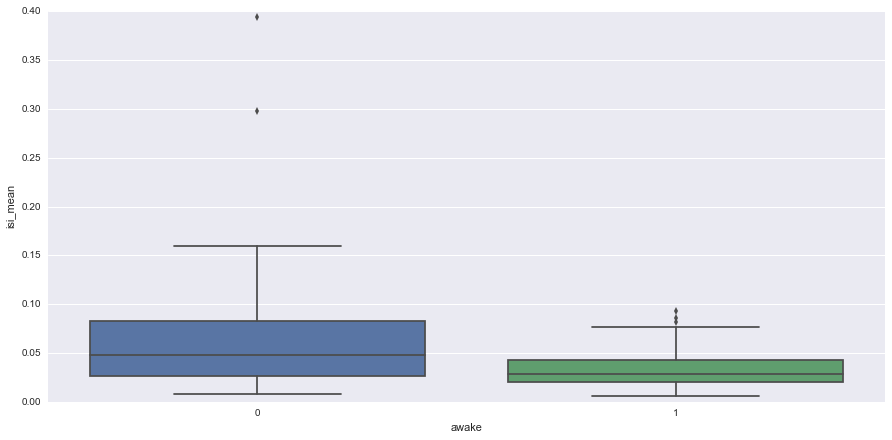

In [89]:
plt.figure(figsize=(15,7))
sns.boxplot(x='awake', y='isi_mean', data=data)

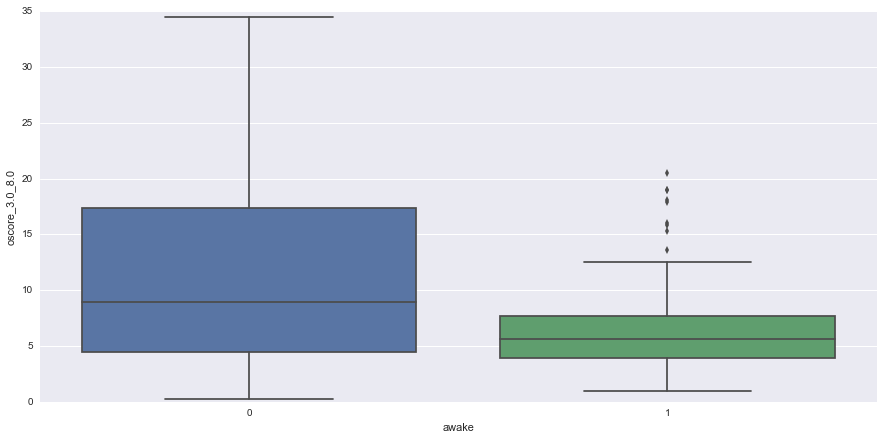

In [91]:
plt.figure(figsize=(15,7))
sns.boxplot(x='awake', y='oscore_3.0_8.0', data=data)

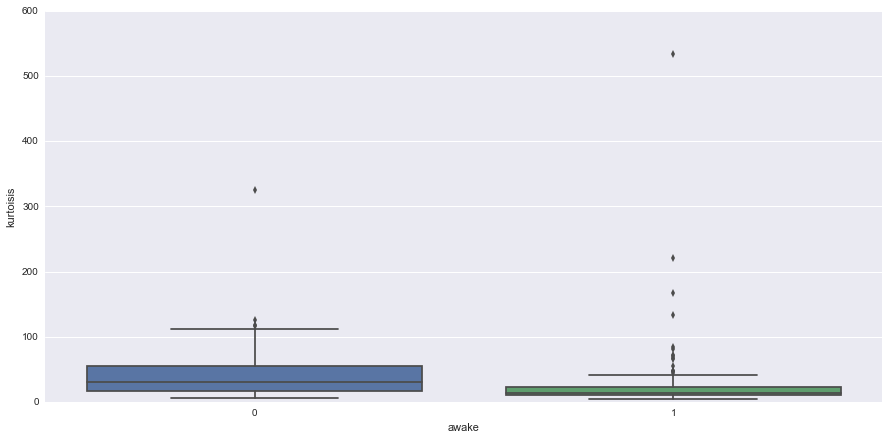

In [92]:
plt.figure(figsize=(15,7))
sns.boxplot(x='awake', y='kurtoisis', data=data)

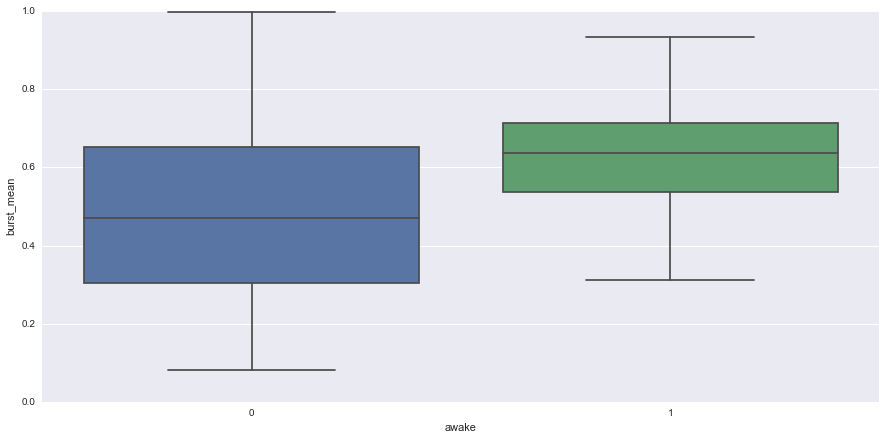

In [93]:
plt.figure(figsize=(15,7))
sns.boxplot(x='awake', y='burst_mean', data=data)

In [95]:
X = data.drop(['awake'], axis=1)
y = data['awake']

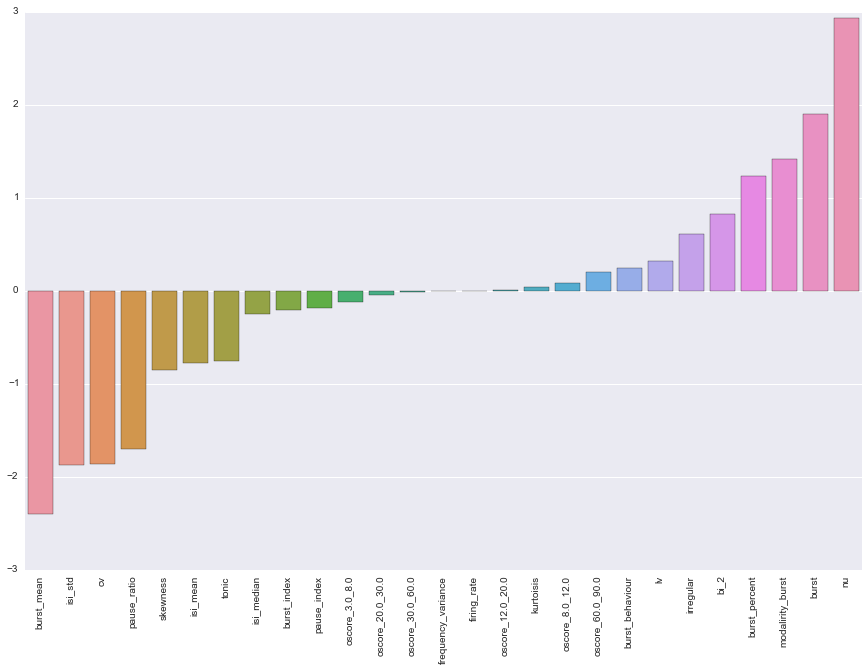

In [121]:
model = LogisticRegressionCV()
model.fit(X, y)

coef = sorted(zip(X.columns.values, model.coef_[0]), key=lambda x: x[1])

plt.figure(figsize=(15, 10))
sns.barplot([c[0] for c in coef], [c[1] for c in coef])

_ = plt.xticks(rotation=90)